In [1]:
import meep as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

sys.path.append('../../..')
from meep_metamaterials.lithography import lithography as lt

Using MPI version 4.0, 1 processes


/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.11/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.11/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.11/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.11/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [2]:
# in mm
T = 12e-3
w = 6e-3
t = 3e-3
speed = 100
dx = 285e-6
dz = 1e-3

# Adjust
w = 10*w
T = 10*T
speed = 10*speed
dx = 10*dx

geometry = [mp.Block(mp.Vector3(w,w,t))]

mat = lt.draw_metamaterial(geometry, a=T, nrows=30, ncols=30, dx=dx, dz=dz, speed=speed)

In [3]:
mat

,xi,yi,pi,xf,yf,pf,t,X,Y,Z
0,-1.77000,-1.77,1,-1.77000,-1.71,1,0.00006,0,0,-0.0015
0,-1.76715,-1.77,1,-1.76715,-1.71,1,0.00006,0,0,-0.0015
0,-1.76430,-1.77,1,-1.76430,-1.71,1,0.00006,0,0,-0.0015
0,-1.76145,-1.77,1,-1.76145,-1.71,1,0.00006,0,0,-0.0015
0,-1.75860,-1.77,1,-1.75860,-1.71,1,0.00006,0,0,-0.0015
...,...,...,...,...,...,...,...,...,...,...
0,1.75845,1.71,1,1.75845,1.77,1,0.00006,0,0,0.0015
0,1.76130,1.71,1,1.76130,1.77,1,0.00006,0,0,0.0015
0,1.76415,1.71,1,1.76415,1.77,1,0.00006,0,0,0.0015
0,1.76700,1.71,1,1.76700,1.77,1,0.00006,0,0,0.0015


In [9]:
powers = np.linspace(0.8, 1, 3) # Range of powers
speeds = np.linspace(10, 100, 3)*10 # Range of speeds in mm/s

sep = 0.6 # Separation between gratings in mm
i, j = 0, 0
M = pd.DataFrame(columns=['xi', 'yi', 'pi', 'xf', 'yf', 'pf', 't', 'X', 'Y', 'Z'])
for power in powers:
    for speed in speeds:
        mt = mat.copy()
        mt['t'] = w/speed
        mt['pi'] = power
        mt['pf'] = power
        mt['X'] = mt['X'] + (i-3.5)*sep
        mt['Y'] = mt['Y'] + (j-3.5)*sep

        j += 1

        M = pd.concat([M, mt])

    j = 0
    i += 1

In [10]:
# Total time
print(M['t'].sum()/3600, 'h')
print(M['t'].sum()/60, 'min')
print(M['t'].sum(), 's')

0.05076000000000002 h
3.045600000000001 min
182.73600000000008 s


In [11]:
M['X'] = M['X'] + 2.5
M['Y'] = M['Y'] + 2.5

lt.save_to_matlab(M, 'part2.mat')

In [12]:
M

,xi,yi,pi,xf,yf,pf,t,X,Y,Z
0,-1.77000,-1.77,0.8,-1.77000,-1.71,0.8,0.00060,-0.1,-0.1,-0.0015
0,-1.76715,-1.77,0.8,-1.76715,-1.71,0.8,0.00060,-0.1,-0.1,-0.0015
0,-1.76430,-1.77,0.8,-1.76430,-1.71,0.8,0.00060,-0.1,-0.1,-0.0015
0,-1.76145,-1.77,0.8,-1.76145,-1.71,0.8,0.00060,-0.1,-0.1,-0.0015
0,-1.75860,-1.77,0.8,-1.75860,-1.71,0.8,0.00060,-0.1,-0.1,-0.0015
...,...,...,...,...,...,...,...,...,...,...
0,1.75845,1.71,1.0,1.75845,1.77,1.0,0.00006,1.1,1.1,0.0015
0,1.76130,1.71,1.0,1.76130,1.77,1.0,0.00006,1.1,1.1,0.0015
0,1.76415,1.71,1.0,1.76415,1.77,1.0,0.00006,1.1,1.1,0.0015
0,1.76700,1.71,1.0,1.76700,1.77,1.0,0.00006,1.1,1.1,0.0015


Add big visible lines

In [14]:
line = lt.draw_block(mp.Block(size=mp.Vector3(0.2*10, 0.5*10, 0.05)), 0, 0, speed=500, power=1, dx=dx, dz=1e-3)

sep = 0.4
m = pd.DataFrame(columns=['xi', 'yi', 'pi', 'xf', 'yf', 'pf', 't', 'X', 'Y', 'Z'])
for i in range(10):
    mt = line.copy()
    mt['X'] = mt['X'] + (i-4.5)*sep
    mt['Y'] = 3

    m = pd.concat([m, mt])

m

,xi,yi,pi,xf,yf,pf,t,X,Y,Z
0,-1.00000,-2.5,1,-1.00000,2.5,1,0.01,-1.8,3,-0.025
0,-0.99715,-2.5,1,-0.99715,2.5,1,0.01,-1.8,3,-0.025
0,-0.99430,-2.5,1,-0.99430,2.5,1,0.01,-1.8,3,-0.025
0,-0.99145,-2.5,1,-0.99145,2.5,1,0.01,-1.8,3,-0.025
0,-0.98860,-2.5,1,-0.98860,2.5,1,0.01,-1.8,3,-0.025
...,...,...,...,...,...,...,...,...,...,...
0,0.98645,-2.5,1,0.98645,2.5,1,0.01,1.8,3,0.025
0,0.98930,-2.5,1,0.98930,2.5,1,0.01,1.8,3,0.025
0,0.99215,-2.5,1,0.99215,2.5,1,0.01,1.8,3,0.025
0,0.99500,-2.5,1,0.99500,2.5,1,0.01,1.8,3,0.025


In [15]:
lt.save_to_matlab(m, 'part3.mat')

In [16]:
m1 = lt.load_from_matlab('part1.mat')
m2 = lt.load_from_matlab('part2.mat')
m3 = lt.load_from_matlab('part3.mat')

m = pd.concat([m1, m2, m3])
lt.save_to_matlab(m, 'combined2.mat')

In [17]:
print(m['t'].sum()/3600, 'h')
print(m['t'].sum()/60, 'min')
print(m['t'].sum(), 's')

1.7663080955475725 h
105.97848573285435 min
6358.709143971261 s


In [18]:
for mat in [m1, m2, m3]:
    print(mat['t'].sum()/3600, 'h')
    print(mat['t'].sum()/60, 'min')
    print(mat['t'].sum(), 's')

0.7210480955475732 h
43.26288573285439 min
2595.7731439712634 s
0.05076000000000002 h
3.045600000000001 min
182.73600000000008 s
0.9945000000000005 h
59.67000000000003 min
3580.2000000000016 s


In [19]:
m

,xi,yi,pi,xf,yf,pf,t,X,Y,Z
0,-1.50000,-1.5,0.1,-1.50000,1.5,0.1,0.03,-4.1,-4.1,-0.005
1,-1.49400,-1.5,0.1,-1.49400,1.5,0.1,0.03,-4.1,-4.1,-0.005
2,-1.48800,-1.5,0.1,-1.48800,1.5,0.1,0.03,-4.1,-4.1,-0.005
3,-1.48200,-1.5,0.1,-1.48200,1.5,0.1,0.03,-4.1,-4.1,-0.005
4,-1.47600,-1.5,0.1,-1.47600,1.5,0.1,0.03,-4.1,-4.1,-0.005
...,...,...,...,...,...,...,...,...,...,...
358015,0.98645,-2.5,1.0,0.98645,2.5,1.0,0.01,1.8,3.0,0.025
358016,0.98930,-2.5,1.0,0.98930,2.5,1.0,0.01,1.8,3.0,0.025
358017,0.99215,-2.5,1.0,0.99215,2.5,1.0,0.01,1.8,3.0,0.025
358018,0.99500,-2.5,1.0,0.99500,2.5,1.0,0.01,1.8,3.0,0.025


In [12]:
M2 = pd.concat([M, square])
# Save
lt.save_to_matlab(M2, 'gratings2.mat')

In [13]:
# Total time
print(M2['t'].sum()/3600, 'h')
print(M2['t'].sum()/60, 'min')
print(M2['t'].sum(), 's')

0.0358724307471845 h
2.15234584483107 min
129.1407506898642 s


(-0.6532275, 0.6497775, -0.6534, 0.6534)

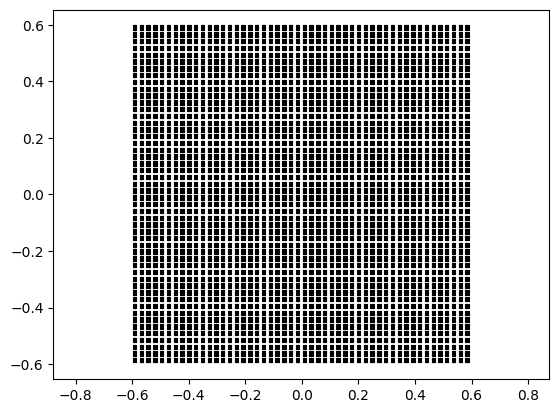

In [4]:
xi = np.array(mat['xi'])
yi = np.array(mat['yi'])
xf = np.array(mat['xf'])
yf = np.array(mat['yf'])
pi = np.array(mat['pi']) # Power
Z = np.array(mat['Z']) # Z coordinate

for i in range(10000):
    plt.plot([xi[i], xf[i]], [yi[i], yf[i]], 'k-')
plt.axis('equal')